Exclude the records that SATIVA has highligted, redo the alignment and rebuild the tree.

In [1]:
from reprophylo import *

In [2]:
pj=Project('../fetch_clean_align_tree/bird_target_locus.csv', pickle='bird_post_SATIVA.pkl', git=False)

DEBUG:Cloud:Log file (/root/.picloud/cloud.log) opened


In [3]:
pj.read_embl_genbank(['../fetch_clean_align_tree/12S_preSATIVA_birds.gb'])

/home/reprophylo/reprophylo.py:1015: UserWarning: Version control off
  warnings.warn('Version control off')


In [4]:
pj.extract_by_locus()

Set the stage:

In [5]:
recs_to_keep = {'rrnS': []}
recs_to_drop = {'rrnS': []}

print "to drop: %s" %len(recs_to_drop['rrnS'])
print "to keep: %s" %len(recs_to_keep['rrnS'])

print "TOTAL: %s" %(len(recs_to_drop['rrnS']) + len(recs_to_keep['rrnS']))

to drop: 0
to keep: 0
TOTAL: 0


Record all record ids and assign them the status keep.

In [6]:
for r in pj.records_by_locus['rrnS']:
    recs_to_keep['rrnS'].append("_".join(r.id.split("_")[:-1]))

In [7]:
print "to drop: %s" %len(recs_to_drop['rrnS'])
print "to keep: %s" %len(recs_to_keep['rrnS'])

print "TOTAL: %s" %(len(recs_to_drop['rrnS']) + len(recs_to_keep['rrnS']))

to drop: 0
to keep: 675
TOTAL: 675


How many do we want to drop? Parse SATIVA output and extract records ids putatively mislabeled.

In [8]:
rec_mislabelled = {}
sativa=open('../SATIVA/12S.mis', 'r')

for line in sativa:
    if not line.startswith(";"):
        rec_mislabelled[line.split("\t")[0]] = line.split("\t")[4]
        

In [9]:
print len(rec_mislabelled)

53


Adjust lists accordingly.

In [10]:
for r in rec_mislabelled:
    print r
    if not r in recs_to_drop['rrnS']:
        print "\tadd to droplist"
        recs_to_drop['rrnS'].append(r)
    for i in reversed(range(len(recs_to_keep['rrnS']))):
#        print i
        if r in recs_to_keep['rrnS'][i]:
            print "\tremove from keeplist"
            del(recs_to_keep['rrnS'][i])

EF027311.1
	add to droplist
	remove from keeplist
AF447226.1
	add to droplist
	remove from keeplist
HQ852931.1
	add to droplist
	remove from keeplist
FR873680.1
	add to droplist
	remove from keeplist
AY635106.1
	add to droplist
	remove from keeplist
DQ674556.1
	add to droplist
	remove from keeplist
FJ603663.1
	add to droplist
	remove from keeplist
AF173577.1
	add to droplist
	remove from keeplist
EF027300.1
	add to droplist
	remove from keeplist
AY164523.1
	add to droplist
	remove from keeplist
FJ752434.1
	add to droplist
	remove from keeplist
AY259407.1
	add to droplist
	remove from keeplist
KP171706.1
	add to droplist
	remove from keeplist
AF230154.1
	add to droplist
	remove from keeplist
AF447237.1
	add to droplist
	remove from keeplist
EU154482.1
	add to droplist
	remove from keeplist
FJ752433.1
	add to droplist
	remove from keeplist
AY631338.1
	add to droplist
	remove from keeplist
AY259424.1
	add to droplist
	remove from keeplist
AF173564.1
	add to droplist
	remove from keeplist


In [11]:
print "to drop: %s" %len(recs_to_drop['rrnS'])
print "to keep: %s" %len(recs_to_keep['rrnS'])

print "TOTAL: %s" %(len(recs_to_drop['rrnS']) + len(recs_to_keep['rrnS']))

to drop: 53
to keep: 622
TOTAL: 675


Write out good records in full Genbank format including all metadata. Adjust to valid species and taxids before doing it.

Identify records with Subspecies.

In [12]:
from collections import defaultdict

Seqs = []
taxon_to_taxid = {}
recs_to_adjust = defaultdict(list)
taxon_to_recs = defaultdict(list)

for r in pj.records:
    if r.id in recs_to_keep['rrnS']:
        Seqs.append(r)
        
        source = [f for f in r.features if f.type == 'source'][0]

        #screen for subspecies and record taxids of valid species
        #if valid species record the taxid
        if (len(source.qualifiers['organism'][0].split(" ")) == 2):
            print source.qualifiers['organism'][0],
            if 'db_xref' in source.qualifiers:
#                print source.qualifiers['db_xref']
                for t in source.qualifiers['db_xref']:
#                    print t
                    if 'taxon' in t:
                        if not source.qualifiers['organism'][0] in taxon_to_taxid:
                            print " .. add to records"
                            taxon_to_taxid[source.qualifiers['organism'][0]] = t.split(":")[1]
                        else:
                            print " .. already covered"
                        taxon_to_recs[source.qualifiers['organism'][0]].append(r.id)
        #if the species status is 'sp.' but has a valid taxid
        elif (len(source.qualifiers['organism'][0].split(" ")) > 2 and source.qualifiers['organism'][0].split(" ")[1] == 'sp.'):
            print source.qualifiers['organism'][0],
            if 'db_xref' in source.qualifiers:
                for t in source.qualifiers['db_xref']:
                    if 'taxon' in t:
                        if not source.qualifiers['organism'][0] in taxon_to_taxid:
                            print " .. add to records"
                            taxon_to_taxid[source.qualifiers['organism'][0]] = t.split(":")[1]
                        else:
                            print " .. already covered" 
                        taxon_to_recs[source.qualifiers['organism'][0]].append(r.id)
        #all other cases we consider dubious, e.g. supspecies
        else:
            print "subspecies: %s" %source.qualifiers['organism'][0]
            recs_to_adjust[r.id] = []

Chrysolophus pictus  .. add to records
Schoeniclus spodocephala  .. add to records
Tringa brevipes  .. add to records
Phoenicopterus roseus  .. add to records
Botaurus stellaris  .. add to records
Poecile palustris  .. add to records
Dupetor flavicollis  .. add to records
Fregata magnificens  .. add to records
Phoenicopterus ruber  .. add to records
Remiz consobrinus  .. add to records
Coturnix coturnix  .. add to records
subspecies: Passer montanus saturatus
Emberiza pusilla  .. add to records
Turdus migratorius  .. add to records
Dupetor flavicollis  .. already covered
Fulica americana  .. add to records
Turdus philomelos  .. add to records
Chlidonias leucopterus  .. add to records
Abrornis inornata  .. add to records
subspecies: Falco tinnunculus interstinctus
subspecies: Buteo buteo burmanicus
Falco naumanni  .. add to records
Charadrius semipalmatus  .. add to records
Recurvirostra avosetta  .. add to records
Pluvialis dominica  .. add to records
Luscinia cyanura  .. add to record

Check if any of the taxa that were considered dubious are not already covered in the list after removing subspecies.

In [13]:
from collections import defaultdict

to_fetch = defaultdict(list)

for r in Seqs:
    if r.id in recs_to_adjust:
        source = [f for f in r.features if f.type == 'source'][0]
        adjust_from = source.qualifiers['organism'][0]
        adjust_to = " ".join(adjust_from.split(" ")[:2])
        print "%s -> %s" %(adjust_from,adjust_to)
        if adjust_to in taxon_to_taxid:
            taxon_to_recs[adjust_to].append(r.id)
            recs_to_adjust[r.id].append(adjust_to)
            recs_to_adjust[r.id].append(taxon_to_taxid[adjust_to])
        else:
            to_fetch[adjust_to].append(r.id)
            recs_to_adjust[r.id].append(adjust_to)

Passer montanus saturatus -> Passer montanus
Falco tinnunculus interstinctus -> Falco tinnunculus
Buteo buteo burmanicus -> Buteo buteo
Milvus migrans lineatus -> Milvus migrans
Haliaeetus albicilla albicilla -> Haliaeetus albicilla
Turdus ruficollis ruficollis -> Turdus ruficollis
Pandion haliaetus haliaetus -> Pandion haliaetus
Phylloscopus fuscatus robustus -> Phylloscopus fuscatus
Phylloscopus fuscatus fuscatus -> Phylloscopus fuscatus
Hirundo rustica gutturalis -> Hirundo rustica
Loxia leucoptera leucoptera -> Loxia leucoptera
Loxia curvirostra minor -> Loxia curvirostra
Limosa limosa melanuroides -> Limosa limosa
Buteo buteo vulpinus -> Buteo buteo
Phylloscopus trochiloides trochiloides -> Phylloscopus trochiloides
Poecile montanus baicalensis -> Poecile montanus
Oenanthe oenanthe oenanthe -> Oenanthe oenanthe
Zoothera dauma aurea -> Zoothera dauma
Accipiter gentilis fujiyamae -> Accipiter gentilis
Aquila chrysaetos japonica -> Aquila chrysaetos
Limosa limosa islandica -> Limosa 

In [14]:
print len(to_fetch)

13


In [15]:
print to_fetch

defaultdict(<type 'list'>, {'Dendrocopos minor': ['KF766041.1'], 'Oenanthe oenanthe': ['EU154491.1'], 'Thalasseus sandvicensis': ['AY631349.1'], 'Turdus ruficollis': ['EU154560.1'], 'Zoothera sibirica': ['EU154578.1'], 'Zoothera dauma': ['KT340629.1', 'EU154573.1'], 'Turdus viscivorus': ['EU154569.1'], 'Loxia leucoptera': ['AF171655.1', 'AF171660.1', 'AF171661.1'], 'Turdus naumanni': ['KJ834096.1'], 'Hirundo rustica': ['KP148840.1', 'KX398931.1'], 'Loxia curvirostra': ['AF171658.1', 'AF171653.1', 'AF171652.1', 'AF171662.1'], 'Seicercus borealis': ['AY635094.1'], 'Oxyura jamaicensis': ['AY747700.1']})


In [16]:
from Bio import Entrez
Entrez.email = "L.Harper@2015.hull.ac.uk"

for binomial in to_fetch:
    print binomial
    handle = Entrez.esearch(db="Taxonomy", term=binomial)
    record = Entrez.read(handle)
    print record["IdList"][0]
    taxon_to_taxid[binomial] = record["IdList"][0]
    
    taxon_to_recs[binomial] = to_fetch[binomial]

Dendrocopos minor
1517834
Oenanthe oenanthe
279966
Thalasseus sandvicensis
126723
Turdus ruficollis
411525
Zoothera sibirica
311352
Zoothera dauma
36288
Turdus viscivorus
301543
Loxia leucoptera
96539
Turdus naumanni
34940
Hirundo rustica
43150
Loxia curvirostra
64802
Seicercus borealis
36273
Oxyura jamaicensis
8884


Update the dictionary that contains binomial name and taxid for every record id with the ones that we have just fetched from NCBI.

In [17]:
for sp in to_fetch:
    print to_fetch[sp]
    for r in to_fetch[sp]:
        print r,recs_to_adjust[r]
        recs_to_adjust[r].append(taxon_to_taxid[recs_to_adjust[r][0]])
        print r,recs_to_adjust[r]

['KF766041.1']
KF766041.1 ['Dendrocopos minor']
KF766041.1 ['Dendrocopos minor', '1517834']
['EU154491.1']
EU154491.1 ['Oenanthe oenanthe']
EU154491.1 ['Oenanthe oenanthe', '279966']
['AY631349.1']
AY631349.1 ['Thalasseus sandvicensis']
AY631349.1 ['Thalasseus sandvicensis', '126723']
['EU154560.1']
EU154560.1 ['Turdus ruficollis']
EU154560.1 ['Turdus ruficollis', '411525']
['EU154578.1']
EU154578.1 ['Zoothera sibirica']
EU154578.1 ['Zoothera sibirica', '311352']
['KT340629.1', 'EU154573.1']
KT340629.1 ['Zoothera dauma']
KT340629.1 ['Zoothera dauma', '36288']
EU154573.1 ['Zoothera dauma']
EU154573.1 ['Zoothera dauma', '36288']
['EU154569.1']
EU154569.1 ['Turdus viscivorus']
EU154569.1 ['Turdus viscivorus', '301543']
['AF171655.1', 'AF171660.1', 'AF171661.1']
AF171655.1 ['Loxia leucoptera']
AF171655.1 ['Loxia leucoptera', '96539']
AF171660.1 ['Loxia leucoptera']
AF171660.1 ['Loxia leucoptera', '96539']
AF171661.1 ['Loxia leucoptera']
AF171661.1 ['Loxia leucoptera', '96539']
['KJ834096.1

Modify the records (if necessary) - adjust subspecies to species.

In [18]:
for r in Seqs:
    if r.id in recs_to_adjust:
        print "adjusting %s" %r.id
        source = r.features[0]
        print "%s\t->\t%s" %(source.qualifiers['organism'][0],recs_to_adjust[r.id][0])
        source = r.features[0]
        source.qualifiers['organism'] = [recs_to_adjust[r.id][0]]
        for i in range(len(source.qualifiers['db_xref'])):
            if 'taxon' in source.qualifiers['db_xref'][i]:
                source.qualifiers['db_xref'][i] = "taxon:"+recs_to_adjust[r.id][1]
        if not 'note' in source.qualifiers:
            source.qualifiers['note'] = ['modified from original record: adjusted to species']
        else:
            source.qualifiers['note'].append('modified from original record: adjusted to species')
#        print r.format('genbank')       
#    print r,recs_to_adjust[r]

adjusting KM577704.1
Passer montanus saturatus	->	Passer montanus
adjusting AB219557.1
Falco tinnunculus interstinctus	->	Falco tinnunculus
adjusting KM364882.1
Buteo buteo burmanicus	->	Buteo buteo
adjusting AB219546.1
Milvus migrans lineatus	->	Milvus migrans
adjusting AB219552.1
Haliaeetus albicilla albicilla	->	Haliaeetus albicilla
adjusting EU154560.1
Turdus ruficollis ruficollis	->	Turdus ruficollis
adjusting AB219554.1
Pandion haliaetus haliaetus	->	Pandion haliaetus
adjusting JF505332.1
Phylloscopus fuscatus robustus	->	Phylloscopus fuscatus
adjusting JF505330.1
Phylloscopus fuscatus fuscatus	->	Phylloscopus fuscatus
adjusting KP148840.1
Hirundo rustica gutturalis	->	Hirundo rustica
adjusting AF171655.1
Loxia leucoptera leucoptera	->	Loxia leucoptera
adjusting AF171658.1
Loxia curvirostra minor	->	Loxia curvirostra
adjusting JQ962991.1
Limosa limosa melanuroides	->	Limosa limosa
adjusting AF202187.1
Buteo buteo vulpinus	->	Buteo buteo
adjusting AY903609.1
Phylloscopus trochiloi

Write only good records with all metadata in Genbank format.

In [19]:
from Bio import SeqIO
       
out = open('../12S_UKbirds_SATIVA_cleaned.gb','w')
SeqIO.write(Seqs, out, "genbank")
out.close()

Exclude the records that were highlighted by SATIVA. Then realign and rebuild phylogeny.

In [20]:
pj.exclude(start_from_max=False, **recs_to_drop)

In [21]:
species=[]
for r in pj.records:
    if r.id in recs_to_keep['rrnS']:
        source = [f for f in r.features if f.type == 'source'][0]
        species.append(" ".join(source.qualifiers['organism'][0].split()[0:2]))
    
#print set(species)
total=len(species)
species=list(set(species))

print "Total number of records: %i" %total
print "Number of species (see below for full list): %i" %len(species)
print sorted(species)

Total number of records: 622
Number of species (see below for full list): 372
['Abrornis humei', 'Abrornis inornata', 'Abrornis proregulus', 'Acanthis flammea', 'Acanthis hornemanni', 'Accipiter gentilis', 'Accipiter nisus', 'Acrocephalus aedon', 'Acrocephalus arundinaceus', 'Acrocephalus dumetorum', 'Acrocephalus scirpaceus', 'Actitis hypoleucos', 'Actitis macularia', 'Aegithalos caudatus', 'Aegolius acadicus', 'Aix galericulata', 'Alauda arvensis', 'Alca torda', 'Alectoris rufa', 'Alle alle', 'Alopochen aegyptiacus', 'Anas acuta', 'Anas carolinensis', 'Anas clypeata', 'Anas crecca', 'Anas discors', 'Anas formosa', 'Anas platyrhynchos', 'Anas querquedula', 'Anser albifrons', 'Anser anser', 'Anser fabalis', 'Apus affinis', 'Apus apus', 'Apus pacificus', 'Apus pallidus', 'Aquila chrysaetos', 'Ardea alba', 'Ardea cinerea', 'Ardea purpurea', 'Ardeola bacchus', 'Arenaria interpres', 'Asio flammeus', 'Asio otus', 'Aythya americana', 'Aythya ferina', 'Aythya fuligula', 'Bartramia longicauda'

Write short 12S rRNA sequences (< 500bp) to fasta file to build new alignment outside Reprophylo later in script using hmmbuild. The Hidden Markov Model alignment will include all 12S rRNA sequences - short and long.

In [22]:
temp_seq = []

for r in pj.records_by_locus['rrnS']:
    if len(r.seq) < 500:
        temp_seq.append(r)
        
total = len(temp_seq)
print "Total number of records: %i" %total

from Bio import SeqIO

out=open('bird_short_to_align_SATIVA.fasta','w')
SeqIO.write(temp_seq, out, 'fasta')
out.close()

Total number of records: 130


# Filter by Length

Write cropped records (minimum length of 500bp) to fasta and Genbank file.

In [23]:
from Bio import SeqIO

temp=[]
for r in pj.records:
    if len(r.seq) >= 500:
        temp.append(r)

out = open('bird12S_cropped_500bp_SATIVA.gb', 'w')
SeqIO.write(temp, out, 'genbank')
out.close()

out = open('bird12S_cropped_500bp_SATIVA.fa', 'w')
SeqIO.write(temp, out, 'fasta')
out.close()


del(temp)

Now view records in cropped genbank file.

In [24]:
for index, record in enumerate(SeqIO.parse("bird12S_cropped_500bp_SATIVA.gb", "genbank")):
        print("index %i, ID = %s, length %i, with %i features"
          % (index, record.id, len(record.seq), len(record.features)))

index 0, ID = LC012932.1, length 651, with 2 features
index 1, ID = AY894140.1, length 557, with 2 features
index 2, ID = EF532932.1, length 970, with 2 features
index 3, ID = DQ674556.1, length 966, with 2 features
index 4, ID = KJ190955.1, length 976, with 2 features
index 5, ID = KP184518.1, length 987, with 2 features
index 6, ID = KJ643141.1, length 971, with 2 features
index 7, ID = AF173576.1, length 973, with 2 features
index 8, ID = DQ674554.1, length 970, with 2 features
index 9, ID = KC463856.1, length 980, with 2 features
index 10, ID = KM577704.1, length 979, with 2 features
index 11, ID = HQ852938.1, length 537, with 2 features
index 12, ID = KJ909198.1, length 973, with 2 features
index 13, ID = AF407141.1, length 972, with 2 features
index 14, ID = EU167074.1, length 972, with 2 features
index 15, ID = AM902522.1, length 724, with 2 features
index 16, ID = AY631324.1, length 688, with 2 features
index 17, ID = HQ852942.1, length 531, with 2 features
index 18, ID = AB219

Now need to filter all 12S rRNA sequences within pj.records dictionary by length to remove all sequences shorter than 500bp within Reprophylo.

Distribution Of Sequence Lengths
Distribution Of Sequence Statistic "Gc_Content"


/usr/lib/pymodules/python2.7/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


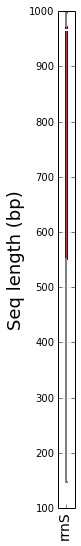

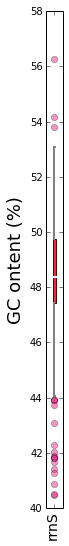

In [25]:
%matplotlib inline
pj.report_seq_stats()

In [26]:
# Define minima and maxima

gc_inliers = {
    'rrnS': [43,54]
}
len_inliers = {
    'rrnS': [500,1000]
}


# Apply to loci data
for locus in gc_inliers:
    # trim GC outliers
    pj.filter_by_gc_content(locus,
                            min_percent_gc=gc_inliers[locus][0],
                            max_percent_gc=gc_inliers[locus][1])

    # trim length outlier
    pj.filter_by_seq_length(locus,
                            min_length=len_inliers[locus][0],
                            max_length=len_inliers[locus][1])

Confirm that the length filter has worked.

Distribution Of Sequence Lengths
Distribution Of Sequence Statistic "Gc_Content"


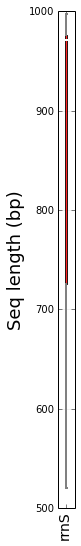

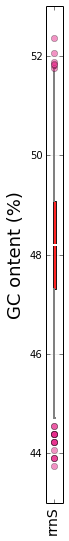

In [27]:
pj.report_seq_stats()

Pickle the project.

In [28]:
pickle_pj(pj, 'bird_post_SATIVA.pkl')

'bird_post_SATIVA.pkl'

# Long Alignment

Now, need to produce a sequence alignment file based on an alignment of all 12S sequences longer than 500bp. This will be done with the AlnConf class.

In [29]:
pj = unpickle_pj('bird_post_SATIVA.pkl', git=False)

muscle default configuration:

In [30]:
muscle_default = AlnConf(pj,
                         method_name="muscleDefault-500bp-SATIVA",
                         program_name="muscle",
                         loci=['rrnS'])

muscle -in 562051477670544.94_rrnS.fasta


In [31]:
pj.align([muscle_default])

In [32]:
print pj.used_methods['muscleDefault-500bp-SATIVA']

AlnConf named muscleDefault-500bp-SATIVA with ID 562051477670544.94
Loci: rrnS 
Created on: Fri Oct 28 16:02:24 2016
Commands:
rrnS: muscle -in 562051477670544.94_rrnS.fasta

Environment:
Platform: Linux-4.4.0-38-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: MUSCLE v3.8.31\nPal2Nal v14
 Program reference:\nEdgar 2004: MUSCLE: multiple sequence alignment with high accuracy and high throughput. Nucleic Acids Research 32(5):1792-1797\nMikita Suyama
 David Torrents
 and Peer Bork (2006) PAL2NAL: robust conversion of protein sequence alignments into the corresponding codon alignments.Nucleic Acids Res. 34
 W609-W612.
execution time:
266.57525301


Core Methods section sentence:
The dataset(s) rrnS we

In [33]:
pj.alignments

{'rrnS@muscleDefault-500bp-SATIVA': <<class 'Bio.Align.MultipleSeqAlignment'> instance (485 records of length 1215, IUPACProtein()) at 7efd9f2f2850>}

In [34]:
# record_id and source_organism are feature qualifiers in the SeqRecord object
files = pj.write_alns(id=['record_id','source_organism'],
                      format='fasta')
files

['rrnS@muscleDefault-500bp-SATIVA_aln.fasta']

Pickle the project.

In [35]:
pickle_pj(pj, 'bird_post_SATIVA.pkl')

'bird_post_SATIVA.pkl'

# Build tree from long alignment

Trim the alignment.

In [36]:
muscle_gappyout = TrimalConf(pj,                       # The Project

                            method_name='gappyout',  # Any unique string 
                                                     # ('gappyout' is default)
                            
                            program_name='trimal',   # No alternatives in 
                                                     # this ReproPhylo version
                            
                            cmd='default',           # the default is trimal. 
                                                     # Change it here
                                                     # or in pj.defaults['trimal']
                            
                            alns=['rrnS@muscleDefault-500bp-SATIVA'],  # 'all' by default
                            
                            trimal_commands={'gappyout': True} # By default, the gappyout algorithm is used.
                           )

trimal -in 584671477670851.23_rrnS@muscleDefault-500bp-SATIVA.fasta -gappyout


In [37]:
pj.trim([muscle_gappyout])

In [38]:
print pj.used_methods['gappyout']

TrimalConf named gappyout with ID 584671477670851.23
Alignments: rrnS@muscleDefault-500bp-SATIVA 
Created on: Fri Oct 28 16:07:31 2016
Commands:
rrnS@muscleDefault-500bp-SATIVA@gappyout: trimal -in 584671477670851.23_rrnS@muscleDefault-500bp-SATIVA.fasta -gappyout

Environment:Platform: Linux-4.4.0-38-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: trimAl 1.2rev59
 Program reference: Salvador Capella-Gutierrez; Jose M. Silla-Martinez; Toni Gabaldon. trimAl: a tool for automated alignment trimming in large-scale phylogenetic analyses. Bioinformatics 2009 25: 1972-1973.
execution time:
2.99957513809

Core Methods section sentence:
The alignment(s) rrnS@muscleDefault-500bp-SATIVA were trimmed using t

In [39]:
pj.trimmed_alignments

{'rrnS@muscleDefault-500bp-SATIVA@gappyout': <<class 'Bio.Align.MultipleSeqAlignment'> instance (485 records of length 605, IUPACAmbiguousDNA()) at 7efd9de5bc50>}

In [40]:
files = pj.write_trimmed_alns(id=['record_id','source_organism'],
                                   format='fasta')
files

['rrnS@muscleDefault-500bp-SATIVA@gappyout_trimmed_aln.fasta']

Infer Maximum Likelihood tree based on the clipped alignment. We are going to use RAxML. Configure RAxML for trimmed muscle alignment.

In [41]:
raxml = RaxmlConf(pj, method_name='raxml-muscleDefault-500bp-SATIVA-trimmed',
                  program_name='raxmlHPC-PTHREADS-SSE3',
                  keepfiles=True,
                  cmd='raxmlHPC-PTHREADS-SSE3',
                  preset='fa',
                  alns=['rrnS@muscleDefault-500bp-SATIVA@gappyout'],
                  model='GAMMA',
                  threads=5,
                  cline_args={'-#': 100})

raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 406631477670872.96_rrnS@muscleDefault-500bp-SATIVA@gappyout0 -p 405 -s 406631477670872.96_rrnS@muscleDefault-500bp-SATIVA@gappyout.fasta -T 5 -x 879 -N 100


Infer tree.

In [42]:
pj.tree([raxml])

In [43]:
print pj.used_methods['raxml-muscleDefault-500bp-SATIVA-trimmed']

RaxmlConf named raxml-muscleDefault-500bp-SATIVA-trimmed with ID 406631477670872.96
Alignments: rrnS@muscleDefault-500bp-SATIVA@gappyout 
Created on: Fri Oct 28 16:07:52 2016
Commands:
rrnS@muscleDefault-500bp-SATIVA@gappyout:
raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 406631477670872.96_rrnS@muscleDefault-500bp-SATIVA@gappyout0 -p 405 -s 406631477670872.96_rrnS@muscleDefault-500bp-SATIVA@gappyout.fasta -T 5 -x 879 -N 100

Environment:
Platform: Linux-4.4.0-38-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: raxmlHPC-PTHREADS-SSE3RAxML version 8.0.12
 Program reference: A. Stamatakis: RAxML Version 8: A tool for Phylogenetic Analysis and Post-Analysis of Large Phylogenies. In Bioinformatics
 2014.


In [44]:
pickle_pj(pj, 'bird_post_SATIVA.pkl')

'bird_post_SATIVA.pkl'

# Visualise Tree

Annotate final tree.

In [45]:
pj.add_qualifier_from_source('organism')

In [46]:
supports = {'black': [100,95],
            'dimgray': [95,75],
            'silver': [75,50]}

In [47]:
for species in ['Lacerta','Trachemys','Vipera']:
    pj.if_this_then_that(species, 'organism', 'outgroup', 'outgroup',
                         mode='part')

In [48]:
pj.clear_tree_annotations()
pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=None,
            html='muscleDefault-trimmed-500bp-bird-raxml-post_SATIVA.html')

Create a static copy of the tree (the last *.png with the expected alignment id) for later.

In [49]:
%%bash

last_png=$(ls -hlrt *rrnS@muscleDefault-500bp-SATIVA@gappyout.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png rrnS_muscleDefault_trimmed_bird_500bp_SATIVA_raxml.png

Pickle the project.

In [50]:
pickle_pj(pj, 'bird_post_SATIVA.pkl')

'bird_post_SATIVA.pkl'

**=======================================================================================================**

In [51]:
from reprophylo import *

In [52]:
pj = unpickle_pj('bird_post_SATIVA.pkl', git=False)

- Identify the record IDs of the sequences shorter than 500bp
- Write these sequences to new fasta file (make sure the sequence IDs are as Reprophylo expects them: 'id_f0')
- Prepare a hmm profile for the alignment the tree is built on (either muscle 'or mafft)

In [53]:
pj.alignments

{'rrnS@muscleDefault-500bp-SATIVA': <<class 'Bio.Align.MultipleSeqAlignment'> instance (485 records of length 1215, IUPACProtein()) at 7efd983f9990>}

In [54]:
from Bio import AlignIO

out=open('500bp_bird_align_SATIVA.fasta','w')

AlignIO.write(pj.fta('rrnS@muscleDefault-500bp-SATIVA'), out, 'fasta')

returning trimmed alignment object rrnS@muscleDefault-500bp-SATIVA@gappyout


1

Check number of records in file containing short 12S rRNA sequences.

In [55]:
from Bio import SeqIO

records = list(SeqIO.parse("bird_short_to_align_SATIVA.fasta", "fasta"))
print("Total records: %i" % len(records))

Total records: 130


Check that record IDs are in format that reprophylo expects for alignment.

In [56]:
from Bio import SeqIO

short_seq = open("bird_short_to_align_SATIVA.fasta", "rU")
sequences = []

for r in SeqIO.parse(short_seq, "fasta"):
    print(r.id)

HQ852944.1_f0
JN695767.1_f0
HQ852934.1_f0
JF914828.1_f0
X86804.1_f0
JF914834.1_f0
EU197058.1_f0
L33370.1_f0
AF140990.1_f0
AY887673.1_f0
AF173712.1_f0
EF027325.1_f0
GQ255993.1_f0
EU154560.1_f0
JQ422404.1_f0
JQ422391.1_f0
L33380.1_f0
AF285807.1_f0
AF285805.1_f0
AB042364.1_f0
AF285799.1_f0
KJ685955.1_f0
AF285801.1_f0
AF285803.1_f0
FJ627047.1_f0
AJ583550.1_f0
JX683977.1_f0
EF027329.1_f0
JQ422425.1_f0
AY766387.1_f0
KJ676690.1_f0
EU154487.1_f0
U88028.1_f0
JN695762.1_f0
U88024.1_f0
EU154539.1_f0
EF027314.1_f0
U88020.1_f0
X87621.1_f0
EF027324.1_f0
EU154549.1_f0
EU154488.1_f0
L33376.1_f0
AF376937.1_f0
JF914825.1_f0
KF781332.1_f0
AF202187.1_f0
AY903609.1_f0
AY887668.1_f0
L33388.1_f0
AY635103.1_f0
AF230152.1_f0
EU154492.1_f0
U38355.1_f0
EU154491.1_f0
KJ676688.1_f0
AF140997.1_f0
JQ962998.1_f0
JX683980.1_f0
JQ422386.1_f0
AY766388.1_f0
AF230156.1_f0
L33390.1_f0
AF285800.1_f0
KJ685956.1_f0
KJ676689.1_f0
JQ962996.1_f0
AF285808.1_f0
X87855.1_f0
X87853.1_f0
KJ676687.1_f0
JQ422444.1_f0
AF230158.1_f0
U880

If record IDs were not in the format Reprophylo expects for tree construction, the code cells below could be used to format them to be 'id_f0'.

In [57]:
#temp_seq = []

#for r in pj.records:
    #if len(r.seq) < 500:
        #temp_seq.append(r)

#from Bio import SeqIO

#out=open('short_to_align.fasta','w')
#SeqIO.write(temp_seq, out, 'fasta')
#out.close()

In [58]:
#from Bio import SeqIO

#short_seq = open("short_to_align.fasta", "rU")
#sequences = []

#for r in SeqIO.parse(short_seq, "fasta"):
    #print(r.id)
    #r.description = r.id+'_f0'
    #r.id = r.description
    #print r.description
    #sequences.append(r)


#out = open("seq_to_align.fasta", "w")
#SeqIO.write(sequences, out, "fasta")
#out.close()

Check that sequences in reprophylo project have not been altered.

In [59]:
for r in pj.records:
    if len(r.seq) < 500:
        print r.id
        print r.description

HQ852944.1
Emberiza spodocephala 12S ribosomal RNA gene, partial sequence.
JN695767.1
Coturnix coturnix isolate Q1 12S ribosomal RNA gene, partial sequence; mitochondrial.
HQ852934.1
Phylloscopus inornatus 12S ribosomal RNA gene, partial sequence; mitochondrial.
JF914828.1
Anas discors voucher UAM:REW 001 D-loop, partial sequence; tRNA-Phe gene, complete sequence; and 12S ribosomal RNA gene, partial sequence; mitochondrial.
X86804.1
F.magnificens 12S mitochondrial rRNA.
JF914834.1
Anas discors voucher UAM:REW 007 D-loop, partial sequence; tRNA-Phe gene, complete sequence; and 12S ribosomal RNA gene, partial sequence; mitochondrial.
EU197058.1
Psittacula krameri isolate T2 12S ribosomal RNA gene, partial sequence; mitochondrial.
L22477.1
Anas platyrhynchos NADH dehydrogenase subunit 6 (ND6) gene, partial cds, tRNA-Glu and tRNA-Phe and 12S ribosomal RNA gene, partial sequence, mitochondrial genes for mitochondrial products.
AY259390.1
Motacilla cinerea cinerea isolate M.cin.Heil mitochon

Pickle the project.

In [60]:
pickle_pj(pj, 'bird_post_SATIVA.pkl')

'bird_post_SATIVA.pkl'

# Add short sequences to reference alignment

In [2]:
!hmmbuild 12S_bird_ref_SATIVA.hmm 500bp_bird_align_SATIVA.fasta

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.1b1 (May 2013); http://hmmer.org/
# Copyright (C) 2013 Howard Hughes Medical Institute.
# Freely distributed under the GNU General Public License (GPLv3).
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             500bp_bird_align_SATIVA.fasta
# output HMM file:                  12S_bird_ref_SATIVA.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen     W eff_nseq re/pos description
#---- -------------------- ----- ----- ----- ----- -------- ------ -----------
1     500bp_bird_align_SATIVA   485   605   605   794     1.85  0.450 

# CPU time: 0.28u 0.00s 00:00:00.28 Elapsed: 00:00:00.28


Now use hmmalign to align the short 12S rRNA sequences to the longer reference alignment.

In [3]:
%%bash

hmmalign -o 12S_bird500bpref_plus_short_query_SATIVA.sto \
--mapali 500bp_bird_align_SATIVA.fasta \
12S_bird_ref_SATIVA.hmm bird_short_to_align_SATIVA.fasta

The hmmalign command has produced a file containing a new alignment of all 12S rRNA sequences (long and short) in stockholm output format. This must be converted to a more useful file format such as fasta or GenBank using the Seq command in BioPython.

In [4]:
from Bio import AlignIO

input_file = open("12S_bird500bpref_plus_short_query_SATIVA.sto", "rU")
output_file = open("12S_BirdAlign_ALL_SATIVA.fasta", "w")

alignment = AlignIO.read(input_file, "stockholm")
count = len(alignment)
AlignIO.write(alignment, output_file, "fasta")

output_file.close()
input_file.close()
print("Converted %i records" % count)

Converted 615 records


# Tree Building

The fasta file containing the 12S rRNA amphibian sequence alignment must now be converted into a format which can be used for alignment trimming. The alignment must be parsed to an alignment object, aln.

In [5]:
pj=unpickle_pj('bird_post_SATIVA.pkl', git=False)

DEBUG:Cloud:Log file (/root/.picloud/cloud.log) opened


In [6]:
from Bio import AlignIO
from Bio.Alphabet import generic_dna

aln = AlignIO.read(open("12S_bird500bpref_plus_short_query_SATIVA.sto"), "stockholm", alphabet=generic_dna)
for r in aln:
    print(r.id + " is " + str(len(r)) + "bp")

EU167057.1_f0 is 1269bp
U89224.1_f0 is 1269bp
U83759.1_f0 is 1269bp
U89227.1_f0 is 1269bp
AF173597.1_f0 is 1269bp
EU167086.1_f0 is 1269bp
KT356220.1_f0 is 1269bp
AY274022.1_f0 is 1269bp
AF406881.1_f0 is 1269bp
AF406882.1_f0 is 1269bp
KP889214.1_f0 is 1269bp
U89228.1_f0 is 1269bp
U83757.1_f0 is 1269bp
AF173593.1_f0 is 1269bp
AY940754.1_f0 is 1269bp
U89208.1_f0 is 1269bp
AY940770.1_f0 is 1269bp
KF766027.1_f0 is 1269bp
KF766026.1_f0 is 1269bp
KF766041.1_f0 is 1269bp
KT350609.1_f0 is 1269bp
KF766048.1_f0 is 1269bp
KF766047.1_f0 is 1269bp
KT340630.1_f0 is 1269bp
U83765.2_f0 is 1269bp
KJ909193.1_f0 is 1269bp
AY136584.1_f0 is 1269bp
AF407103.1_f0 is 1269bp
KP995437.1_f0 is 1269bp
EU167054.1_f0 is 1269bp
U86142.1_f0 is 1269bp
KT004451.1_f0 is 1269bp
KU058639.1_f0 is 1269bp
KJ598622.1_f0 is 1269bp
HQ915867.1_f0 is 1269bp
JN018413.1_f0 is 1269bp
KF509923.1_f0 is 1269bp
Y18522.2_f0 is 1269bp
AF386463.1_f0 is 1269bp
AY136582.1_f0 is 1269bp
JQ083495.1_f0 is 1269bp
KC463856.1_f0 is 1269bp
KJ909187.1

In [7]:
pj.alignments['rrnS@bird_align_allseq_SATIVA'] = aln

In [8]:
pj.alignments

{'rrnS@bird_align_allseq_SATIVA': <<class 'Bio.Align.MultipleSeqAlignment'> instance (615 records of length 1269, DNAAlphabet()) at 7f9d6de41fd0>,
 'rrnS@muscleDefault-500bp-SATIVA': <<class 'Bio.Align.MultipleSeqAlignment'> instance (485 records of length 1215, IUPACProtein()) at 7f9d6de0a410>}

In [9]:
pj.alignments.keys()

['rrnS@bird_align_allseq_SATIVA', 'rrnS@muscleDefault-500bp-SATIVA']

Trim the alignment.

In [10]:
gappyout = TrimalConf(pj,                      # The Project

                      method_name='gappyout',  # Any unique string 
                                               # ('gappyout' is default)

                      program_name='trimal',   # No alternatives in 
                                               # this ReproPhylo version

                      cmd='default',           # the default is trimal. 
                                               # Change it here
                                               # or in pj.defaults['trimal']

                      alns=['rrnS@bird_align_allseq_SATIVA'],# 'all' by default

                      trimal_commands={'gappyout': True} # By default, the gappyout algorithm is used.
                      )

trimal -in 397151477849508.27_rrnS@bird_align_allseq_SATIVA.fasta -gappyout


In [11]:
pj.trim([gappyout])

In [12]:
print pj.used_methods['gappyout']

TrimalConf named gappyout with ID 397151477849508.27
Alignments: rrnS@bird_align_allseq_SATIVA 
Created on: Sun Oct 30 17:45:08 2016
Commands:
rrnS@bird_align_allseq_SATIVA@gappyout: trimal -in 397151477849508.27_rrnS@bird_align_allseq_SATIVA.fasta -gappyout

Environment:Platform: Linux-4.4.0-38-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: trimAl 1.2rev59
 Program reference: Salvador Capella-Gutierrez; Jose M. Silla-Martinez; Toni Gabaldon. trimAl: a tool for automated alignment trimming in large-scale phylogenetic analyses. Bioinformatics 2009 25: 1972-1973.
execution time:
4.07524299622

Core Methods section sentence:
The alignment(s) rrnS@bird_align_allseq_SATIVA were trimmed using the progr

In [13]:
pj.trimmed_alignments

{'rrnS@bird_align_allseq_SATIVA@gappyout': <<class 'Bio.Align.MultipleSeqAlignment'> instance (615 records of length 604, IUPACAmbiguousDNA()) at 7f9d6de794d0>,
 'rrnS@muscleDefault-500bp-SATIVA@gappyout': <<class 'Bio.Align.MultipleSeqAlignment'> instance (485 records of length 605, IUPACAmbiguousDNA()) at 7f9d7031dd90>}

In [14]:
files = pj.write_trimmed_alns(id=['record_id','source_organism'],
                                   format='fasta')
files

['rrnS@muscleDefault-500bp-SATIVA@gappyout_trimmed_aln.fasta',
 'rrnS@bird_align_allseq_SATIVA@gappyout_trimmed_aln.fasta']

Infer Maximum Likelihood tree based on the clipped alignment. We are going to use RAxML.

Configure RAxML.

In [15]:
raxml = RaxmlConf(pj, method_name='raxml-muscleDefault-trimmed',
                  program_name='raxmlHPC-PTHREADS-SSE3',
                  keepfiles=True,
                  cmd='raxmlHPC-PTHREADS-SSE3',
                  preset='fa',
                  alns=['rrnS@bird_align_allseq_SATIVA@gappyout'],
                  model='GAMMA', 
                  threads=5,
                  cline_args={'-#': 100})

raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 567111477849675.06_rrnS@bird_align_allseq_SATIVA@gappyout0 -p 651 -s 567111477849675.06_rrnS@bird_align_allseq_SATIVA@gappyout.fasta -T 5 -x 122 -N 100


In [16]:
pj.tree([raxml])

In [17]:
print pj.used_methods['raxml-muscleDefault-trimmed']

RaxmlConf named raxml-muscleDefault-trimmed with ID 567111477849675.06
Alignments: rrnS@bird_align_allseq_SATIVA@gappyout 
Created on: Sun Oct 30 17:47:55 2016
Commands:
rrnS@bird_align_allseq_SATIVA@gappyout:
raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 567111477849675.06_rrnS@bird_align_allseq_SATIVA@gappyout0 -p 651 -s 567111477849675.06_rrnS@bird_align_allseq_SATIVA@gappyout.fasta -T 5 -x 122 -N 100

Environment:
Platform: Linux-4.4.0-38-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: raxmlHPC-PTHREADS-SSE3RAxML version 8.0.12
 Program reference: A. Stamatakis: RAxML Version 8: A tool for Phylogenetic Analysis and Post-Analysis of Large Phylogenies. In Bioinformatics
 2014.
execution time:
6658.

In [18]:
pj.trees.keys()

['rrnS@muscleDefault-500bp-SATIVA@gappyout@raxml-muscleDefault-500bp-SATIVA-trimmed',
 'rrnS@bird_align_allseq_SATIVA@gappyout@raxml-muscleDefault-trimmed']

Pickle the project.

In [19]:
pickle_pj(pj, 'bird_post_SATIVA.pkl')

'bird_post_SATIVA.pkl'

# Visualise tree

Now let's visualize the tree containing all 12S rRNA sequences with outliers identified by SATIVA removed.

- Prepare tree annotation:
- define outgroups
- specify support coloration

In [20]:
pj.add_qualifier_from_source('organism')

In [21]:
for species in ['Lacerta','Trachemys','Vipera']:
    pj.if_this_then_that(species, 'organism', 'outgroup', 'outgroup',
                         mode='part')

In [22]:
supports = {'black': [100,95],
            'dimgray': [95,75],
            'silver': [75,50]}

In [23]:
pj.clear_tree_annotations()
pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=10,
            html='muscleDefault-trimmed-bird-all-SATIVA-raxml.html')

Create a static copy of the tree (the last *.png with the expected alignment id) for later.

In [24]:
%%bash

last_png=$(ls -hlrt *rrnS@bird_align_allseq_SATIVA@gappyout.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png rrnS_muscleDefault-trimmed-bird-all-SATIVA-raxml.png

Pickle the project.

In [25]:
pickle_pj(pj, 'bird_post_SATIVA.pkl')

'bird_post_SATIVA.pkl'

Write out alignment for pplacer input. Need to modify record id - remove the '_f0' that is appended by Reprophylo.

In [26]:
from Bio import AlignIO

aln = pj.fta('rrnS@bird_align_allseq_SATIVA@gappyout')

for r in aln:
    r.id = "_".join(r.id.split("_")[:-1])
    r.description = r.id
    
out=open('../12S_UKbirds_SATIVA_cleaned.alignment.fasta', 'w')
AlignIO.write(aln, out, 'fasta')
out.close()

out=open('../12S_UKbirds_SATIVA_cleaned.alignment.phylip', 'w')
AlignIO.write(aln, out, 'phylip-relaxed')
out.close()

returning trimmed alignment object rrnS@bird_align_allseq_SATIVA@gappyout
